In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from persistent_vector import *
from homology import compute_Homology_k
from persistent_homology import metric_space_to_PHk_Xr
from sklearn.datasets import make_circles

$$
Here,\ I\ will\ compute\ the\ 0th\ and\ 1st\ persistent\  homology\ denoted\ PH_{0}(X)_{r}\\ or\ PH_{1}(X)_{r}\ for\ the\ given\ finite\ metric\ space\ data\ set\ (X,d).
$$


$$
The\ dataset\ I\ used\ to\ test\ the\ algorithm\ I\ programmed\ is\ consist\ of\ 17\ data\ points\
$$
$$
which\ form\ an\ unit\ circle\ with\ some\ marginal\ errors\ in\ R^{2}.
$$

Here are the steps I took to compute the persistent homology:
1. Turn finite metric space data into abstract complex (Viterois Rips Complex)
2. Combine all VR complex to make a finite persistent vector space
3. Get boundary matrix of chain complex Ck and Ck+1 and do row_reduction
4. Compute the dimension of ker and img of boundary maps dk and dk+1 to get dim H_k(X)_r for fixed r
5. Compute the dimension of H_k(X)_r for all r (if needed)

Form data (unit circle in R2 but with some marginal errors around the circle)

<Axes: >

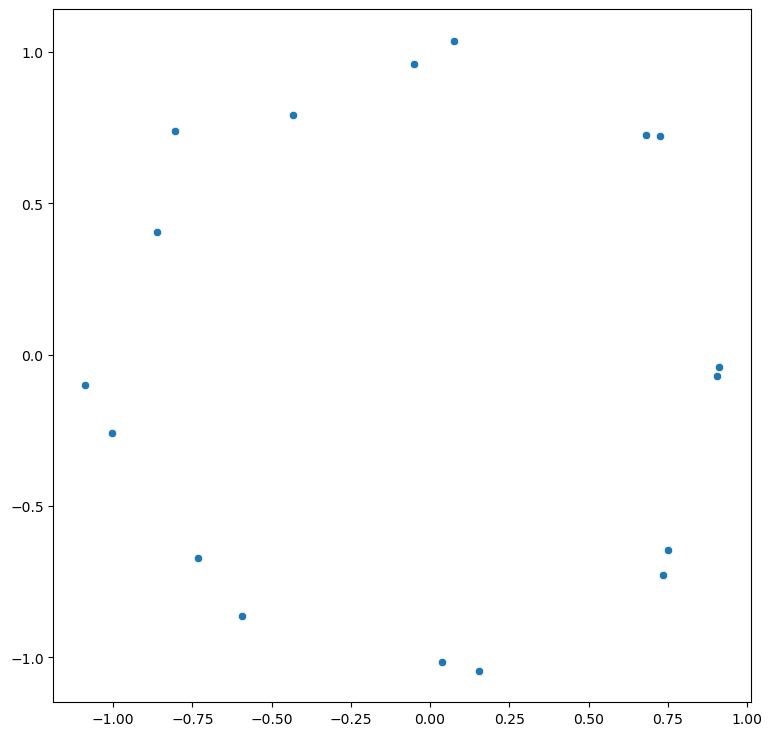

In [2]:
from sklearn.datasets import make_circles
# form a data (unit circle in R2 but with some marginal errors around the circle)
data = make_circles(n_samples=17, shuffle=True, noise=None, random_state=0, factor=0.99)[0]
for i in range(len(data)):
    error = np.random.uniform(low=-0.1, high=0.1, size=2)
    data[i] += error
    
plt.figure(figsize=(9,9))
sns.scatterplot(x=data[:,0], y=data[:,1])

Get all possible finite number of r

In [3]:
adjacency_matrix = get_adjacency_matrix(data)
finite_set_of_r = sorted(set(adjacency_matrix.flatten()))
print(finite_set_of_r)

[0.0, 0.0285998, 0.0438838, 0.0848084, 0.1201767, 0.1476219, 0.1812398, 0.2381227, 0.3400895, 0.3768145, 0.4172539, 0.4922599, 0.5513419, 0.5639688, 0.5806118, 0.5966613, 0.625216, 0.6478715, 0.6620544, 0.6730396, 0.6772554, 0.6809879, 0.681286, 0.7098532, 0.7190925, 0.721644, 0.7301647, 0.7556809, 0.7680476, 0.7689143, 0.7863414, 0.7868621, 0.8010667, 0.8055974, 0.8116677, 0.8122401, 0.8263076, 0.8437062, 0.8848872, 0.9106738, 0.9303895, 0.9620488, 0.9854155, 1.017199, 1.082954, 1.1076525, 1.1162223, 1.1328232, 1.1601004, 1.1965343, 1.2325693, 1.258365, 1.2856014, 1.2865714, 1.2960136, 1.3112303, 1.3350139, 1.3620816, 1.3644837, 1.3681511, 1.3730043, 1.3831891, 1.3894219, 1.3972654, 1.4057522, 1.412113, 1.4511746, 1.4511996, 1.455453, 1.4694638, 1.4838647, 1.4848775, 1.4871873, 1.4950575, 1.5309732, 1.547427, 1.5603126, 1.5783412, 1.5823031, 1.5923126, 1.6166814, 1.6205371, 1.6272086, 1.6646364, 1.6812146, 1.6861471, 1.6974215, 1.7158417, 1.7472024, 1.7625141, 1.7693357, 1.7694981, 1.

Applying the algorithms to our example data set

Case where fixed value of r was given for computing k-th persistent homology of VR(x[r])

In [4]:
# three examples of k-th PH(X)r with fixed values of r
n = len(finite_set_of_r) - 1
# 0-th persistent homology for fixed r
print("0-th persistent homology")
r, phk_X = metric_space_to_PHk_Xr(data, 0, r=finite_set_of_r[np.random.randint(0,n)]) 
print(f"r value:\n{r}")
print(f"0-th persistent homology of r={r}:\n{phk_X}")
r, phk_X = metric_space_to_PHk_Xr(data, 0, r=finite_set_of_r[np.random.randint(0,n)]) 
print(f"r value:\n{r}")
print(f"0-th persistent homology of r={r}:\n{phk_X}")
r, phk_X = metric_space_to_PHk_Xr(data, 0, r=finite_set_of_r[np.random.randint(0,n)]) 
print(f"r value:\n{r}")
print(f"0-th persistent homology of r={r}:\n{phk_X}\n")

# 1-th persistent homology for all finite number of r
print("1-th persistent homology")
r, phk_X = metric_space_to_PHk_Xr(data, 1, r=finite_set_of_r[np.random.randint(0,n)]) 
print(f"r value:\n{r}")
print(f"1-th persistent homology of r={r}:\n{phk_X}")
r, phk_X = metric_space_to_PHk_Xr(data, 1, r=finite_set_of_r[np.random.randint(0,n)]) 
print(f"r value:\n{r}")
print(f"1-th persistent homology of r={r}:\n{phk_X}")
r, phk_X = metric_space_to_PHk_Xr(data, 1, r=finite_set_of_r[np.random.randint(0,n)]) 
print(f"r value:\n{r}")
print(f"1-th persistent homology of r={r}:\n{phk_X}")

0-th persistent homology
r value:
1.3644837
0-th persistent homology of r=1.3644837:
1
r value:
1.7694981
0-th persistent homology of r=1.7694981:
1
r value:
1.6812146
0-th persistent homology of r=1.6812146:
1

1-th persistent homology
r value:
0.8116677
1-th persistent homology of r=0.8116677:
7
r value:
1.2856014
1-th persistent homology of r=1.2856014:
16
r value:
1.4950575
1-th persistent homology of r=1.4950575:
16


In [5]:
# now applying the algorithms to our example data set for all r
# 0-th persistent homology for all finite number of r
all_r, phk_X = metric_space_to_PHk_Xr(data,0)
print(f"all possible r values:\n{all_r}")
print(f"0-th persistent homology in the ascending order of r:\n{phk_X}")
# 1-th persistent homology for all finite number of r
all_r, phk_X = metric_space_to_PHk_Xr(data,1)
print(f"all possible r values:\n{all_r}")
print(f"1-th persistent homology in the ascending order of r:\n{phk_X}")


all possible r values:
[0.0, 0.0285998, 0.0438838, 0.0848084, 0.1201767, 0.1476219, 0.1812398, 0.2381227, 0.3400895, 0.3768145, 0.4172539, 0.4922599, 0.5513419, 0.5639688, 0.5806118, 0.5966613, 0.625216, 0.6478715, 0.6620544, 0.6730396, 0.6772554, 0.6809879, 0.681286, 0.7098532, 0.7190925, 0.721644, 0.7301647, 0.7556809, 0.7680476, 0.7689143, 0.7863414, 0.7868621, 0.8010667, 0.8055974, 0.8116677, 0.8122401, 0.8263076, 0.8437062, 0.8848872, 0.9106738, 0.9303895, 0.9620488, 0.9854155, 1.017199, 1.082954, 1.1076525, 1.1162223, 1.1328232, 1.1601004, 1.1965343, 1.2325693, 1.258365, 1.2856014, 1.2865714, 1.2960136, 1.3112303, 1.3350139, 1.3620816, 1.3644837, 1.3681511, 1.3730043, 1.3831891, 1.3894219, 1.3972654, 1.4057522, 1.412113, 1.4511746, 1.4511996, 1.455453, 1.4694638, 1.4838647, 1.4848775, 1.4871873, 1.4950575, 1.5309732, 1.547427, 1.5603126, 1.5783412, 1.5823031, 1.5923126, 1.6166814, 1.6205371, 1.6272086, 1.6646364, 1.6812146, 1.6861471, 1.6974215, 1.7158417, 1.7472024, 1.7625141, 1

Conclusion:

0-th persistent homology becomes 1 as r>=0.649508. This is consistent with the scatter plot of our data. When r is sufficiently large, the points in the data set forms a circle and this represents one connected component in 0-th homology. Therefore, 0-th persistent homology well captured this information in data.

1-st persistent homology represents the number of empty 2-simplices(triangle). The number of hollow trianlges is increasing and maxed at r=1.7973056. After that, it seems that the number of hollow trainagles slowly decreases and suddenly drop at r=2.1070383.